<a href="https://colab.research.google.com/github/REICHIYAN/REI/blob/master/AlgoTrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install git+https://github.com/pydata/pandas-datareader.git

In [0]:
from pandas_datareader import data

start_date = '2010-01-01'
end_date = '2018-01-01'

goog_data = data.DataReader('GOOG', 'yahoo', start_date, )

In [95]:
print(goog_data)

                   High          Low  ...      Volume    Adj Close
Date                                  ...                         
2010-01-04   313.579620   310.954468  ...   3927000.0   312.204773
2010-01-05   312.747742   309.609497  ...   6031900.0   310.829926
2010-01-06   311.761444   302.047852  ...   7987100.0   302.994293
2010-01-07   303.861053   295.218445  ...  12876600.0   295.940735
2010-01-08   300.498657   293.455048  ...   9483900.0   299.885956
...                 ...          ...  ...         ...          ...
2020-05-18  1392.324951  1354.250000  ...   1824000.0  1383.939941
2020-05-19  1392.000000  1373.484985  ...   1280600.0  1373.484985
2020-05-20  1410.420044  1387.250000  ...   1655400.0  1406.719971
2020-05-21  1415.489990  1393.449951  ...   1385000.0  1402.800049
2020-05-22  1412.760010  1391.829956  ...   1308600.0  1410.420044

[2615 rows x 6 columns]


In [96]:
import pandas as pd

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_diferrence'] = goog_data_signal['price'].diff()

print(goog_data_signal.head())

                 price  daily_diferrence
Date                                    
2010-01-04  312.204773               NaN
2010-01-05  310.829926         -1.374847
2010-01-06  302.994293         -7.835632
2010-01-07  295.940735         -7.053558
2010-01-08  299.885956          3.945221


In [97]:
import numpy as np

goog_data_signal['signal'] = 0.0
goog_data_signal['signal'] = np.where(goog_data_signal['daily_diferrence'] > 0, 1.0, 0.0)

print(goog_data_signal.head())

                 price  daily_diferrence  signal
Date                                            
2010-01-04  312.204773               NaN     0.0
2010-01-05  310.829926         -1.374847     0.0
2010-01-06  302.994293         -7.835632     0.0
2010-01-07  295.940735         -7.053558     0.0
2010-01-08  299.885956          3.945221     1.0


In [98]:
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
print(goog_data_signal.head())

                 price  daily_diferrence  signal  positions
Date                                                       
2010-01-04  312.204773               NaN     0.0        NaN
2010-01-05  310.829926         -1.374847     0.0        0.0
2010-01-06  302.994293         -7.835632     0.0        0.0
2010-01-07  295.940735         -7.053558     0.0        0.0
2010-01-08  299.885956          3.945221     1.0        1.0


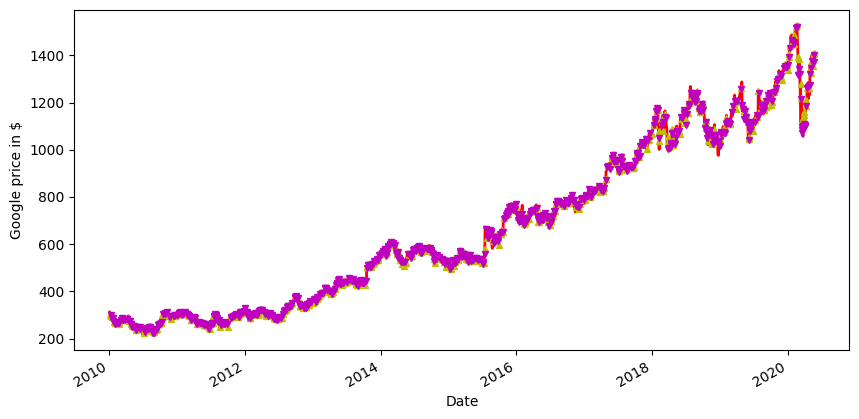

In [99]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions==1.0].index, goog_data_signal.price[goog_data_signal.positions==1.0],'^', markersize=5, color='y')
ax1.plot(goog_data_signal.loc[goog_data_signal.positions==-1.0].index, goog_data_signal.price[goog_data_signal.positions==-1.0],'v', markersize=5, color='m')

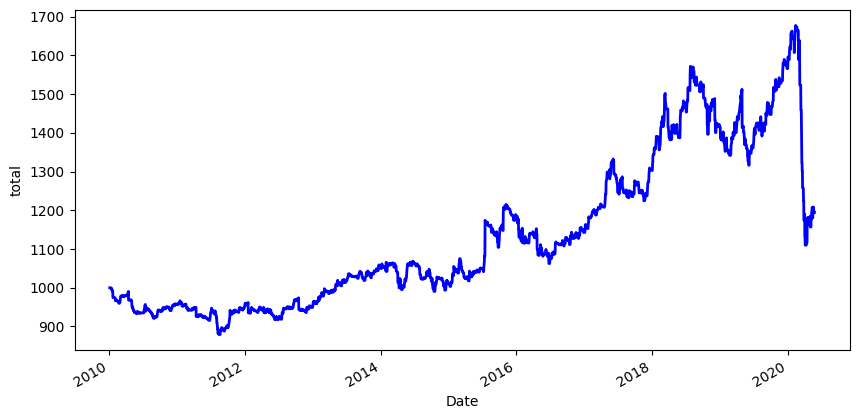

In [100]:
initial_capital = float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

positions['GOOG'] =goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='total')
portfolio['total'].plot(ax=ax1, color='b', lw=2.)

In [0]:
# Next Step

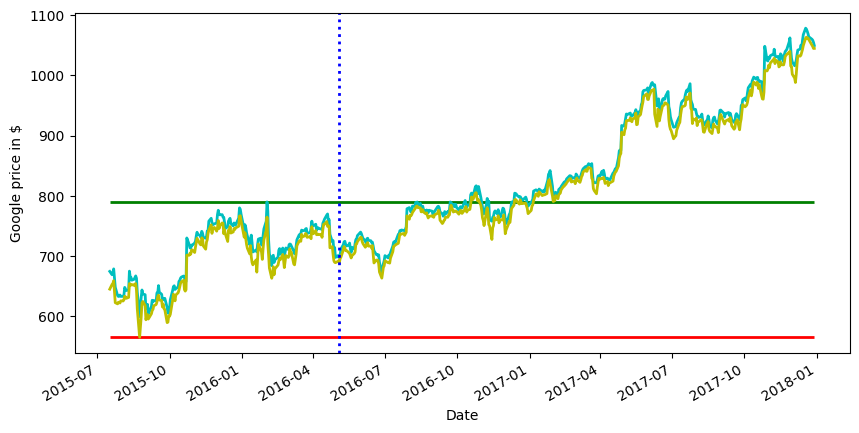

In [111]:
import pandas as pd
from pandas_datareader import data

start_date = '2010-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='google_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data=goog_data2.tail(620)
lows=goog_data['Low']
highs=goog_data['High']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')

highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1, color='y', lw=2.)

plt.hlines(highs.head(200).max(),lows.index.values[0],lows.index.values[-1],linewidth=2,color='g')
plt.hlines(lows.head(200).min(),lows.index.values[0],lows.index.values[-1],linewidth=2,color='r')
plt.axvline(linewidth=2,color='b',x=lows.index.values[200],linestyle=':')
plt.show()

In [103]:
import pandas as pd
import numpy as np
from pandas_datareader import data

start_date = '2010-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='google_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
  print('File data found...reading GOOG data')
except FileNotFoundError:
  print('File not found...downlosding the GOOG data')
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']

File data found...reading GOOG data


In [0]:
def trading_support_resistance(data, bin_width=20):
  data['sup_tolerance'] = pd.DataFrame(np.zeros(len(data)))
  data['res_tolerance'] = pd.DataFrame(np.zeros(len(data)))
  data['sup_count'] = pd.DataFrame(np.zeros(len(data)))
  data['res_count'] = pd.DataFrame(np.zeros(len(data)))
  data['sup'] = pd.DataFrame(np.zeros(len(data)))
  data['res'] = pd.DataFrame(np.zeros(len(data)))
  data['positions'] = pd.DataFrame(np.zeros(len(data)))
  data['signal'] = pd.DataFrame(np.zeros(len(data)))
  in_support=0
  in_registance=0

  for x in range((bin_width -1) + bin_width, len(data)):
    data_section = data[x - bin_width:x -1]
    support_level=min(data_section['price'])
    resistance_level=max(data_section['price'])
    range_level=resistance_level-support_level
    data['res'][x]=resistance_level
    data['sup'][x]=support_level
    data['sup_tolerance'][x]=support_level + 0.2 * range_level
    data['res_tolerance'][x]=resistance_level - 0.2 * range_level
  
    if data['price'][x]>=data['res_tolerance'][x] and data['price'][x]<=data['res'][x]:
      in_resistance+=1
      data['res_count'][x]=in_resistance
    elif data['price'][x]<=data['res_tolerance'][x] and data['price'][x]>=data['res'][x]:
      in_support+=1
      data['sup_count'][x]=in_support
    else:
      in_support=0
      in_resistance=0
    if in_registance>2:
      data['signal'][x]=1
    elif in_support>2:
      data['signal'][x]=0
    else:
      data['signal'][x]=data['signal'][x-1]
  
  data['positions']=data['signal'].diff()

trading_support_resistance(goog_data_signal)

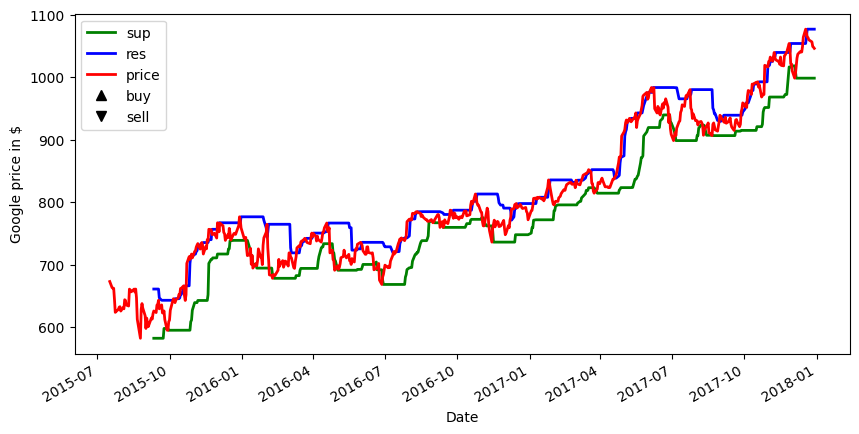

In [105]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['sup'].plot(ax=ax1, color='g', lw=2.)
goog_data_signal['res'].plot(ax=ax1, color='b', lw=2.)
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions==1.0].index, goog_data_signal.price[goog_data_signal.positions==1.0],'^', markersize=7, color='k', label='buy')
ax1.plot(goog_data_signal.loc[goog_data_signal.positions==-1.0].index, goog_data_signal.price[goog_data_signal.positions==-1.0],'v', markersize=7, color='k', label='sell')

plt.legend()
plt.show()

In [0]:
#!pip install statistics

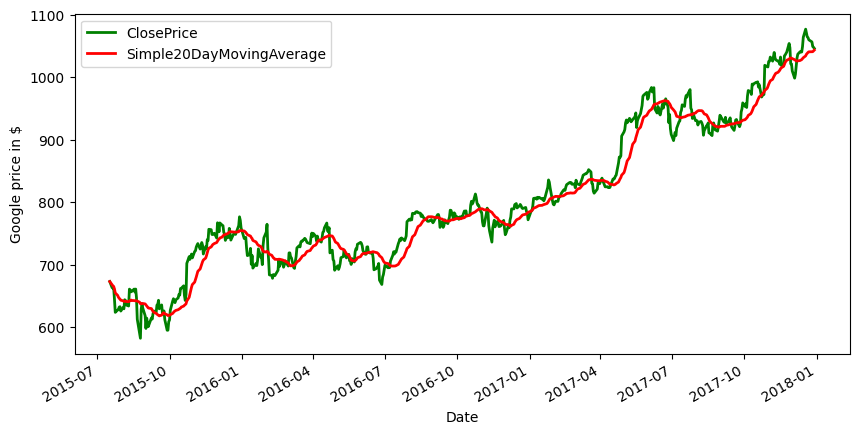

In [107]:
import pandas as pd
from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']


import statistics as stats

time_period = 20 
history = [] 
sma_values = [] 

for close_price in close:
  history.append(close_price)
  if len(history) > time_period:
    del (history[0])

  sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

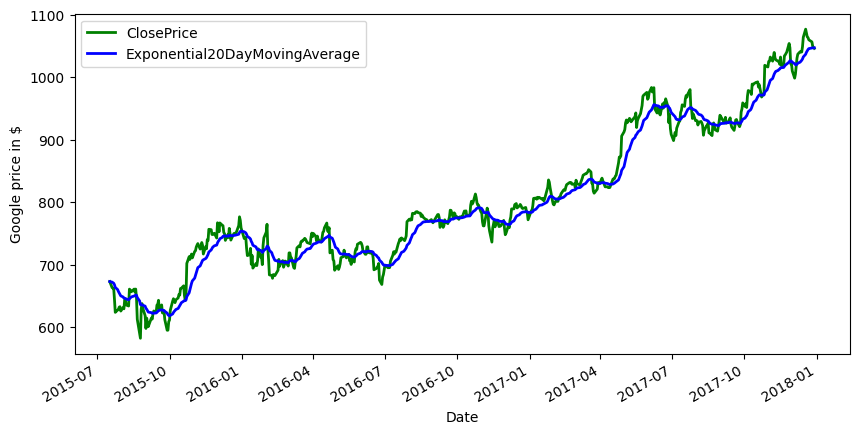

In [108]:
import pandas as pd

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

num_periods = 20
K = 2/(num_periods + 1)
ema_p = 0
ema_values = []

for close_price in close:
  if (ema_p==0):
    ema_p = close_price
  else:
    ema_p = (close_price - ema_p) * K + ema_p

  ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

from pandas_datareader import data

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.savefig('ema.png')
plt.show()

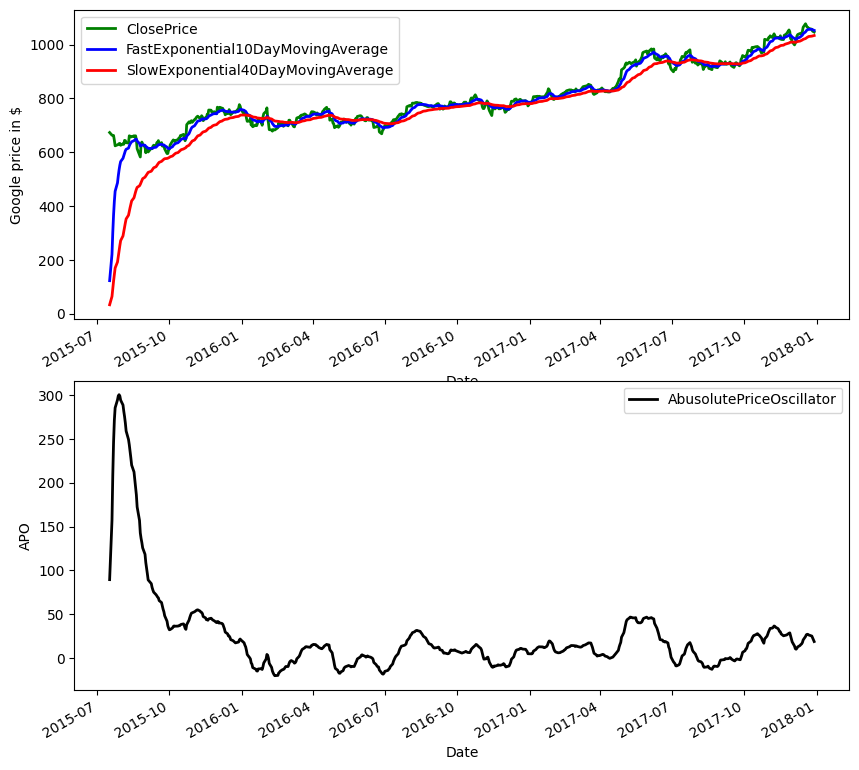

In [109]:
import pandas as pd
from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

num_periods_fast = 10
K_fast = 2/(num_periods_fast + 1)
ema_fast = 0

num_periods_slow = 40
K_slow = 2/(num_periods_slow + 1)
ema_slow = 0

ema_fast_values = []
ema_slow_values = []
apo_values = []

for close_price in close:
  if (ema_p==0):
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)
  apo_values.append(ema_fast - ema_slow)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(AbusolutePriceOscillator=pd.Series(apo_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
apo = goog_data['AbusolutePriceOscillator']

from pandas_datareader import data

fig = plt.figure(figsize=(10,10),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)
plt.show()

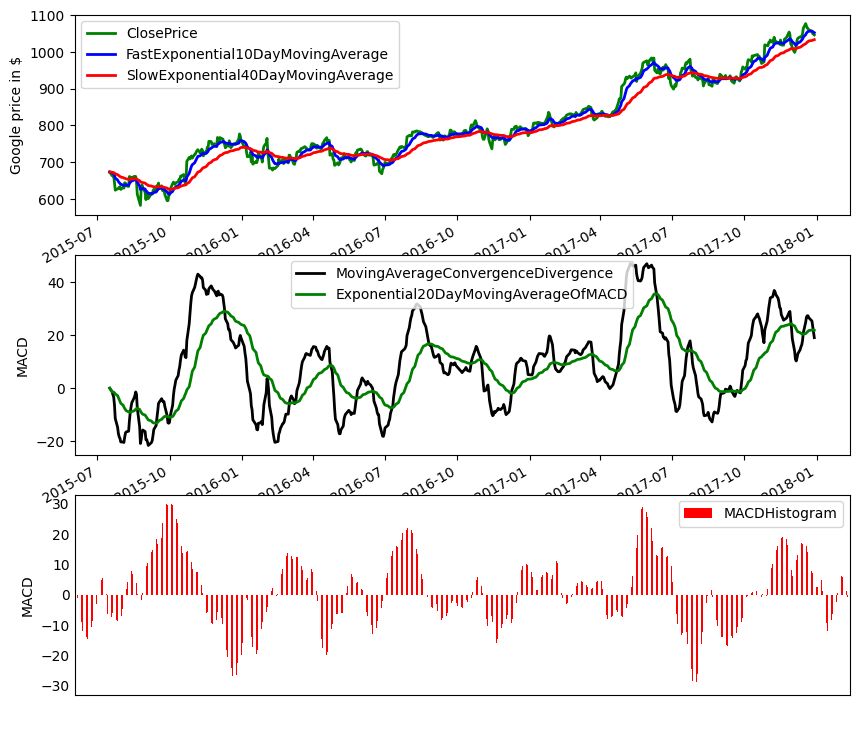

In [110]:
import pandas as pd
from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

num_periods_fast = 10
K_fast = 2/(num_periods_fast + 1)
ema_fast = 0

num_periods_slow = 40
K_slow = 2/(num_periods_slow + 1)
ema_slow = 0

num_periods_macd = 20
K_macd = 2/(num_periods_macd + 1)
ema_macd = 0

ema_fast_values = []
ema_slow_values = []
macd_values = []
macd_signal_values = []

macd_histogram_values = []

for close_price in close:
  if (ema_fast==0):
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)
  macd = ema_fast - ema_slow

  if ema_macd == 0:
    ema_macd = macd
  else:
    ema_macd = (macd - ema_macd) * K_slow + ema_macd

  macd_values.append(macd)
  macd_signal_values.append(ema_macd)
  macd_histogram_values.append(macd - ema_macd)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(MovingAverageConvergenceDivergence=pd.Series(macd_values, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(macd_signal_values, index=goog_data.index))
goog_data = goog_data.assign(MACDHistogram=pd.Series(macd_histogram_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
macd = goog_data['MovingAverageConvergenceDivergence']
ema_macd = goog_data['Exponential20DayMovingAverageOfMACD']
macd_histogram = goog_data['MACDHistogram']

from pandas_datareader import data

fig = plt.figure(figsize=(10,10),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
macd.plot(ax=ax2, color='black', lw=2., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', lw=2., kind='bar', legend=True, use_index=False)
plt.xticks(color="None")
plt.tick_params(length=0)
plt.show()